In [5]:
import re
import json
import ast
import os
import numpy as np
from PIL import Image
from fuzzywuzzy import fuzz

In [ ]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_trf")

In [3]:
ratio = lambda x, y: fuzz.token_sort_ratio(x, y)
lemmatization = lambda text,allowed_postags=["ADJ","ADV","INTJ","NUM","NOUN","PROPN","VERB"]: [token.lemma_ for token in nlp(text) if token.pos_ in allowed_postags]

In [ ]:
#True simili >=75%
#False altrimenti
def simili(x,y,soglia=75):
    if x is None or y is None:
        return False
    if len(x)==0 and len(y)==0:
        return True
    if len(x)==0 or len(y)==0:
        return False
    return ratio(x,y)>=soglia

In [3]:
profili=["lilyebert","thetrueadventures","tovafriedman"]

### Lemmatizzazione video to text

In [ ]:
for profilo in profili:
    lista_txt=[txt for txt in os.listdir(f"video/{profilo}/ocr") if txt[-3:]=="txt"]
    for txt in lista_txt:
        with open(f"video/{profilo}/ocr/{txt}","r") as f:
            ocr_list=ast.literal_eval(f.read())
            lista_lemmi=[]
            for frase in ocr_list:
                lista_lemmi.extend(lemmatization(frase))
            json.dump(lista_lemmi,open(f"video/{profilo}/ocr2/{txt}","w"))  

### Lemmatizzazione audio to text

In [ ]:
for profilo in profili:
    lista_testo=[testo for testo in os.listdir(f"video/{profilo}/audio/testo")]
    for testo in lista_testo:
        with open(f"video/{profilo}/audio/testo/{testo}","r") as f:
            frase=f.read().strip('""').strip()
            lemm=lemmatization(frase)
            json.dump(lemm,open(f"video/{profilo}/audio/testo2/{testo}","w"))

In [8]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from collections import Counter

In [10]:
listaVideoInteressanti=json.load(open("lista_analisi_Ma.txt","r"))
listaVideoInteressanti_video=[video.split("/")[-1] for video in listaVideoInteressanti]
listaVideoNonInteressanti=json.load(open("lista_analisi_mi.txt","r"))
listaVideoNonInteressanti_video=[video.split("/")[-1] for video in listaVideoNonInteressanti]

In [11]:
lista_paroleAudio={p:{"int":[],"nonint":[]} for p in profili}
for profilo in profili:
    lista_testo=[testo for testo in os.listdir(f"video/{profilo}/audio/testo2") if testo[-3:]=="txt"]
    for testo in lista_testo:
        with open(f"video/{profilo}/audio/testo2/{testo}","r") as f:
            if testo[:-4] in listaVideoInteressanti_video:
                lista_paroleAudio[profilo]["int"].extend(ast.literal_eval(f.read()))
            if testo[:-4] in listaVideoNonInteressanti_video:
                lista_paroleAudio[profilo]["nonint"].extend(ast.literal_eval(f.read()))

In [12]:
lista_paroleVideo={p:{"int":[],"nonint":[]} for p in profili}
for profilo in profili:
    lista_testo=[testo for testo in os.listdir(f"video/{profilo}/ocr4") if testo[-3:]=="txt"]
    for testo in lista_testo:
        with open(f"video/{profilo}/ocr2/{testo}","r") as f:
            if testo[:-4] in listaVideoInteressanti_video:
                lista_paroleVideo[profilo]["int"].extend(ast.literal_eval(f.read()))
            if testo[:-4] in listaVideoNonInteressanti_video:
                lista_paroleVideo[profilo]["nonint"].extend(ast.literal_eval(f.read()))

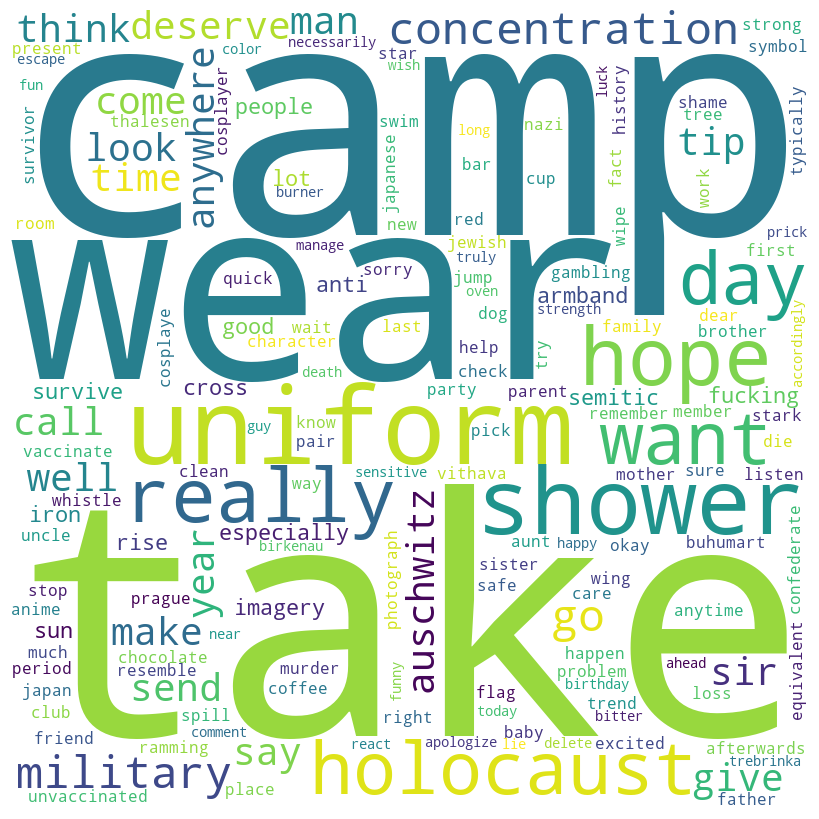

In [15]:
comment_words = " ".join([parola.lower() for parola in lista_paroleAudio["thetrueadventures"]["int"]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()